
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('R1 Sales.csv')

In [4]:
df.head()

,Month,R1 sales
0,2010-01,2815.0
1,2010-02,2672.0
2,2010-03,2755.0
3,2010-04,2721.0
4,2010-05,2946.0


In [5]:
df.tail()

,Month,R1 sales
102,2018-07,4298.0
103,2018-08,1413.0
104,2018-09,5877.0
105,NaN,NaN
106,R1 Sales,NaN


In [6]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [7]:
df.tail()

,Month,R1 sales
101,2018-06,5312.0
102,2018-07,4298.0
103,2018-08,1413.0
104,2018-09,5877.0
105,NaN,NaN


In [8]:
df.drop(105,axis=0,inplace=True)

In [9]:
df.tail()

,Month,R1 sales
100,2018-05,4618.0
101,2018-06,5312.0
102,2018-07,4298.0
103,2018-08,1413.0
104,2018-09,5877.0


In [10]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [11]:
df.head()

,Month,R1 sales
0,2010-01-01,2815.0
1,2010-02-01,2672.0
2,2010-03-01,2755.0
3,2010-04-01,2721.0
4,2010-05-01,2946.0


In [12]:
df.set_index('Month',inplace=True)

In [13]:
df.head()

,R1 sales
Month,
2010-01-01,2815.0
2010-02-01,2672.0
2010-03-01,2755.0
2010-04-01,2721.0
2010-05-01,2946.0


In [14]:
df.describe()

,R1 sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

<Axes: xlabel='Month'>

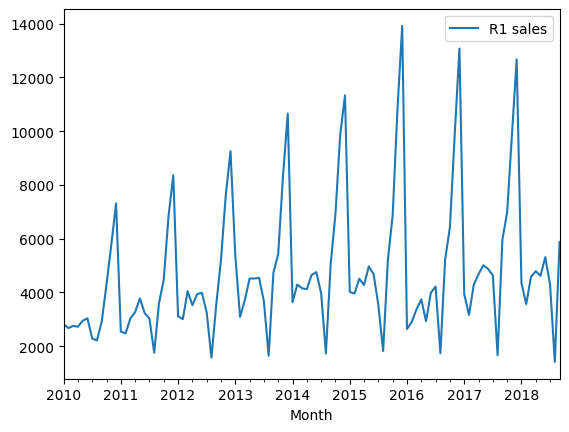

In [15]:
df.plot()

In [16]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(df['R1 sales'])

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [20]:
adfuller_test(df['R1 sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [21]:
df['Sales First Difference'] = df['R1 sales'] - df['R1 sales'].shift(1)

In [22]:
df['R1 sales'].shift(1)

Month
2010-01-01       NaN
2010-02-01    2815.0
2010-03-01    2672.0
2010-04-01    2755.0
2010-05-01    2721.0
               ...  
2018-05-01    4788.0
2018-06-01    4618.0
2018-07-01    5312.0
2018-08-01    4298.0
2018-09-01    1413.0
Name: R1 sales, Length: 105, dtype: float64

In [23]:
df['Seasonal First Difference']=df['R1 sales']-df['R1 sales'].shift(12)

In [24]:
df.head(14)

,R1 sales,Sales First Difference,Seasonal First Difference
Month,,,
2010-01-01,2815.0,NaN,NaN
2010-02-01,2672.0,-143.0,NaN
2010-03-01,2755.0,83.0,NaN
2010-04-01,2721.0,-34.0,NaN
2010-05-01,2946.0,225.0,NaN
2010-06-01,3036.0,90.0,NaN
2010-07-01,2282.0,-754.0,NaN
2010-08-01,2212.0,-70.0,NaN
2010-09-01,2922.0,710.0,NaN


In [25]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

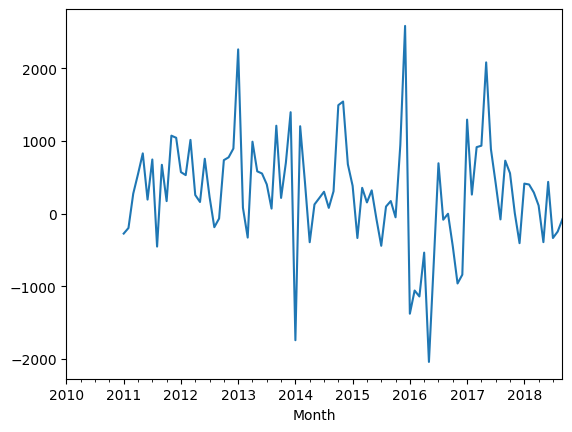

In [26]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
![image.png](attachment:image.png)

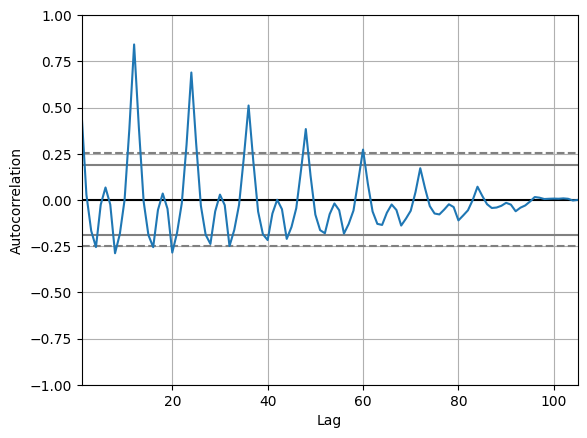

In [31]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['R1 sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt


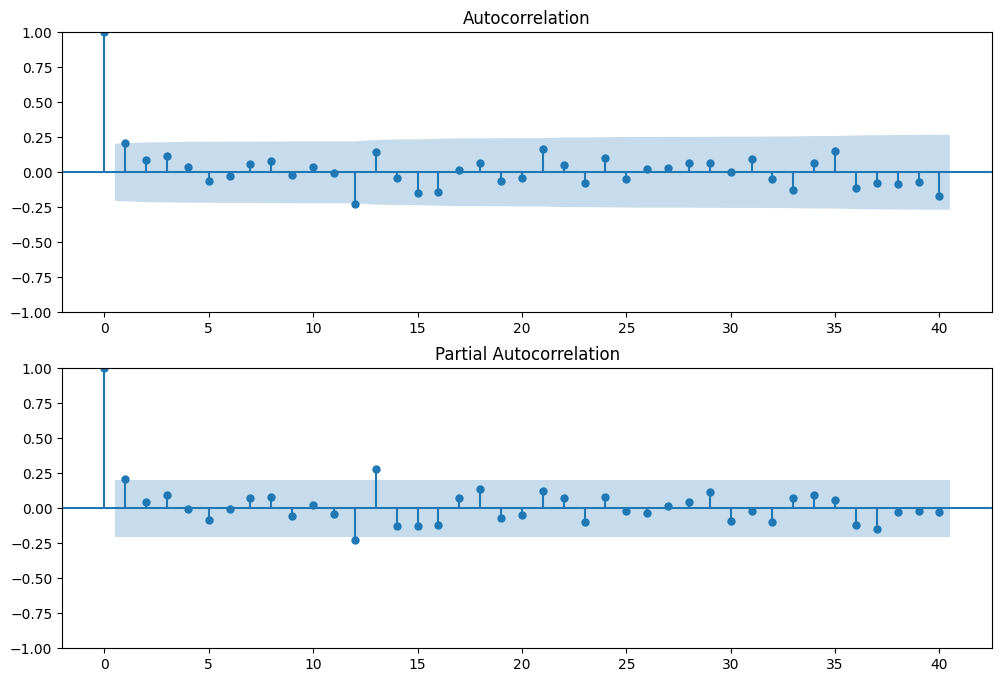

In [34]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [41]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [42]:
model = SARIMAX(df['R1 sales'], order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [43]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               R1 sales   No. Observations:                  105
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 05 Apr 2024   AIC                           1911.627
Time:                        08:17:16   BIC                           1919.560
Sample:                    01-01-2010   HQIC                          1914.841
                         - 09-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

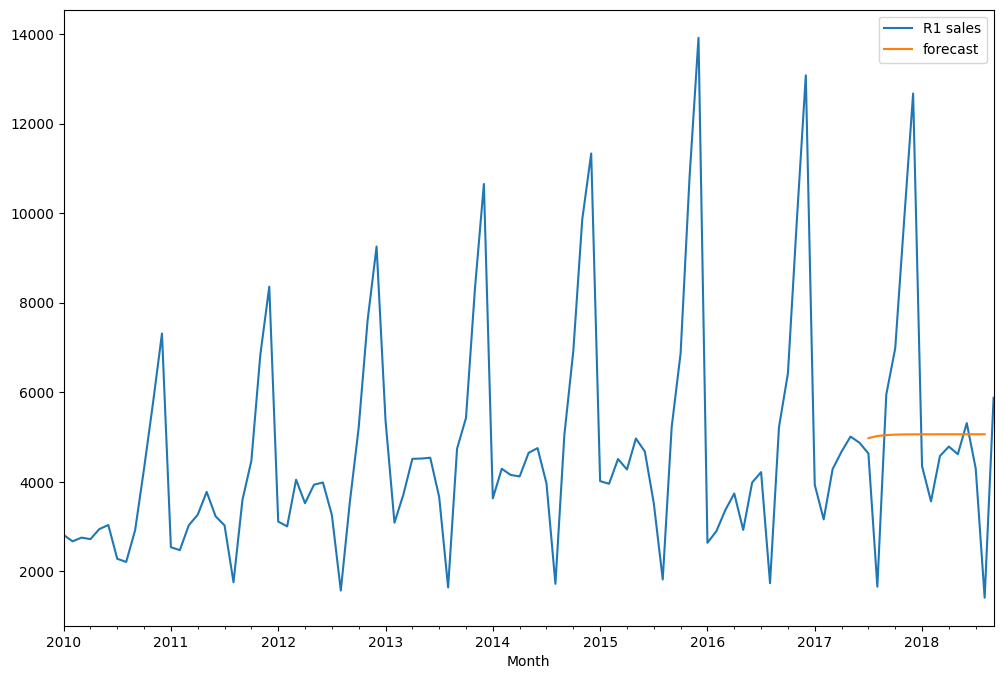

In [44]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['R1 sales','forecast']].plot(figsize=(12,8))

In [45]:
import statsmodels.api as sm

In [47]:
model=sm.tsa.statespace.SARIMAX(df['R1 sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

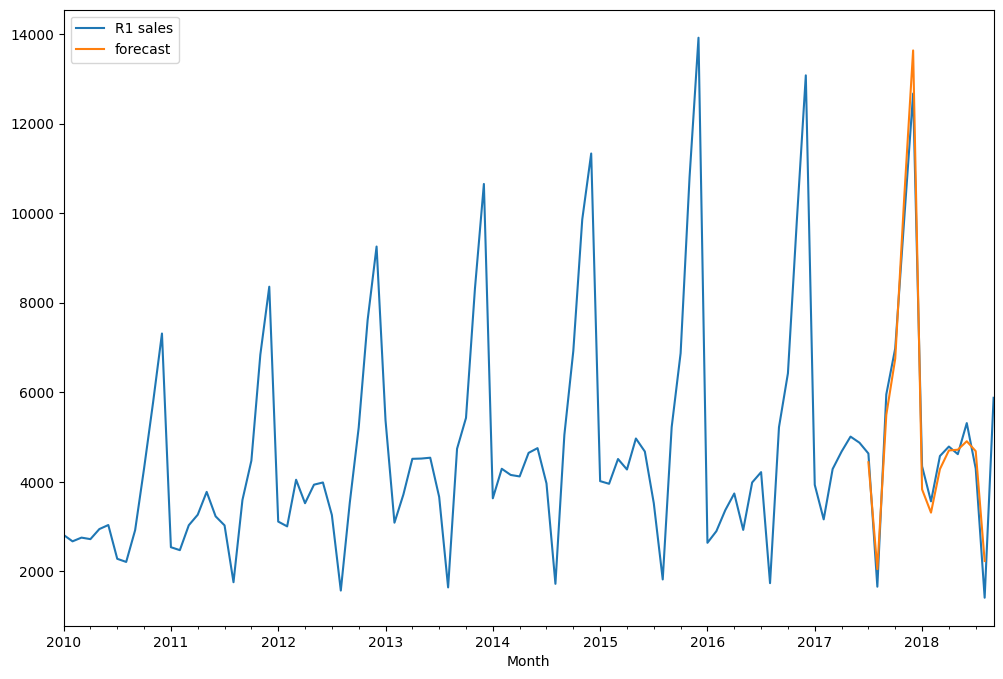

In [48]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['R1 sales','forecast']].plot(figsize=(12,8))

In [49]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [50]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [51]:
future_datest_df.tail()

,R1 sales,Sales First Difference,Seasonal First Difference,forecast
2020-04-01,NaN,NaN,NaN,NaN
2020-05-01,NaN,NaN,NaN,NaN
2020-06-01,NaN,NaN,NaN,NaN
2020-07-01,NaN,NaN,NaN,NaN
2020-08-01,NaN,NaN,NaN,NaN


In [52]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

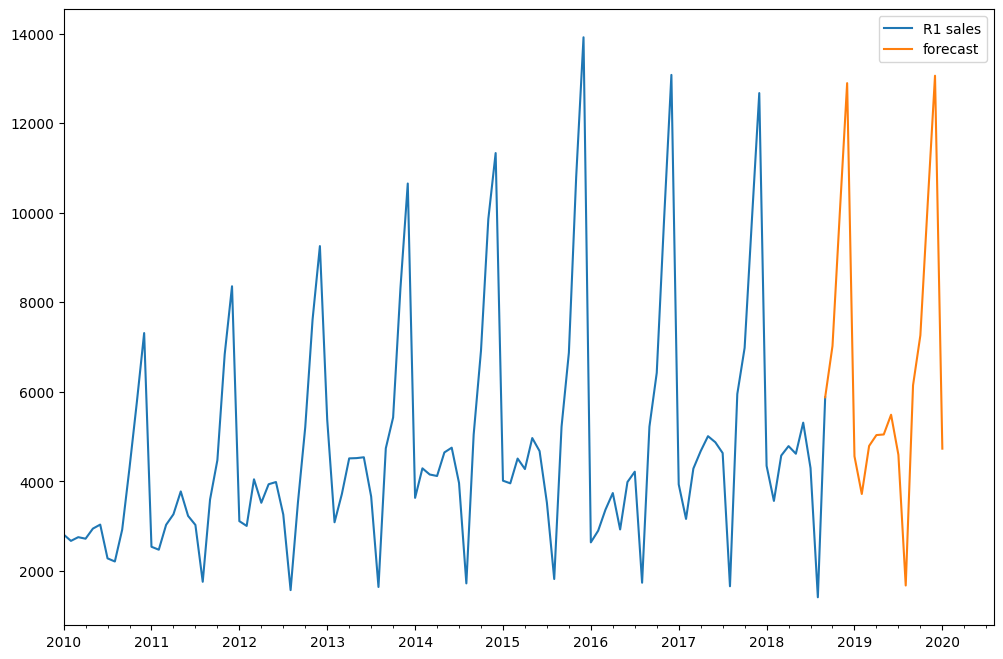

In [54]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)
future_df[['R1 sales', 'forecast']].plot(figsize=(12, 8))

In [61]:
future_df.tail(20)




,R1 sales,Sales First Difference,Seasonal First Difference,forecast
2019-01-01,NaN,NaN,NaN,4561.509258
2019-02-01,NaN,NaN,NaN,3718.817489
2019-03-01,NaN,NaN,NaN,4792.360855
2019-04-01,NaN,NaN,NaN,5034.610380
2019-05-01,NaN,NaN,NaN,5047.956601
2019-06-01,NaN,NaN,NaN,5488.573097
2019-07-01,NaN,NaN,NaN,4593.627938
2019-08-01,NaN,NaN,NaN,1676.138612
2019-09-01,NaN,NaN,NaN,6146.224045
2019-10-01,NaN,NaN,NaN,7262.512323
